# Part 1

$\varepsilon$ greedy Algorithm

In [97]:
import numpy as npy ## 宣布numpy就是我的npy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random
import copy
import math

In [3]:
##定义奖励返回函数,输入值是机械臂索引,返回值是reward
def reward(arg):
    theta=[0.7,0.5,0.4]
    if npy.random.rand(1)>theta[arg]:
        return 0
    else:
        return 1

In [4]:
##定义贪心算法,varepsilon是参数,times是循环次数
def greedy(varepsilon,times):
    ##创建200次总收益的数组
    rewards = npy.zeros(times)
    for i in range(times):
        ## 初始化参数
        
        N=5000
        theta = [0,0,0]
        count = [0,0,0]
        for t in range(N):
            if theta[0]==theta[1]:
                if theta[1]==theta[2]:
                    It = npy.random.randint(0, 3)
                else:
                    It = npy.random.randint(0, 2)
            elif theta[1]==theta[2]:
                It = npy.random.randint(1, 2)
            elif theta[0]==theta[2]:
                It = random.choice([0,2])
            elif npy.random.rand(1) >varepsilon:
                It = npy.argmax(theta)
            else:
                It = npy.random.randint(0, 3)
            count[It]+=1
            
            rit=reward(It)
            rewards[i]+=rit
            a=1/(count[It])*(rit-theta[It])
            theta[It]=theta[It]+a
    return npy.average(rewards)

In [10]:
print(greedy(0.1,200))
print(greedy(0.5,200))
print(greedy(0.9,200))

3407.955
3076.395
2751.5


0.03


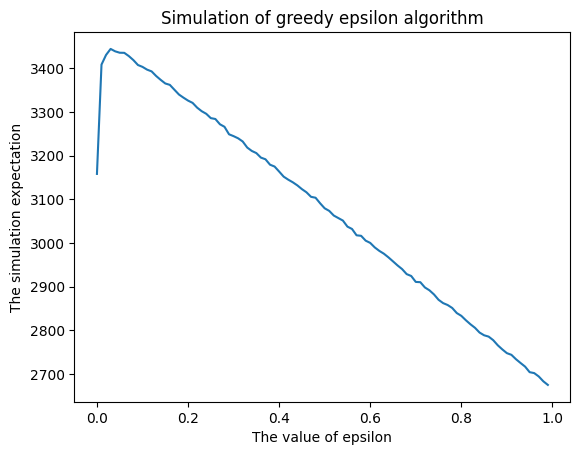

In [35]:
epsilon=npy.arange(0,1,0.01)

Eepsilon=npy.zeros(100)
for i in range(100):
    Eepsilon[i]=greedy(i*0.01,200)

print(npy.argmax(Eepsilon)*0.01)
plt.plot(epsilon,Eepsilon)

plt.xlabel('The value of epsilon')
plt.ylabel('The simulation expectation')
plt.title('Simulation of greedy epsilon algorithm')
plt.show()

由上图可知,$E(\varepsilon)$最大的时候$\varepsilon$是0.05

In [19]:
print(greedy(0.05,200))

3444.335


UCB Algorithm

In [5]:
def UCB(c,times):
    rewards=npy.zeros(times)
    for i in range(times):
        N = 5000  # 总数
        theta = [0,0,0]
        count = [0,0,0]
        # 先试验前三次
        for j in range(3):
            count[j] += 1
            rit = reward(j)
            rewards[i] += rit
            theta[j] += rit

        for t in range(3,N):
            # 选择最优
            max_value = 0
            max_index = 0
            l=npy.zeros(3)
            for k in range(3):
                l[k] = theta[k] + c * npy.sqrt((2 * npy.log(t + 1)) / count[k])
            if l[0]==l[1]:
                if l[1]==l[2]:
                    max_index = npy.random.randint(0, 3)
                else:
                    max_index = npy.random.randint(0, 2)
            elif l[1]==l[2]:
                max_index = npy.random.randint(1, 2)
            elif l[0]==l[2]:
                max_index = random.choice([0,2])    
            else:
                max_index = npy.argmax(l)
                    
            rit = reward(max_index)
            rewards[i] += rit
            count[max_index] += 1
            # 更新theta
            theta[max_index]=theta[max_index] + 1/(count[max_index])*(rit-theta[max_index])
    return npy.average(rewards)

In [33]:
print(UCB(1,200))
print(UCB(5,200))
print(UCB(10,200))

3409.345
2980.63
2830.855


0.30000000000000004


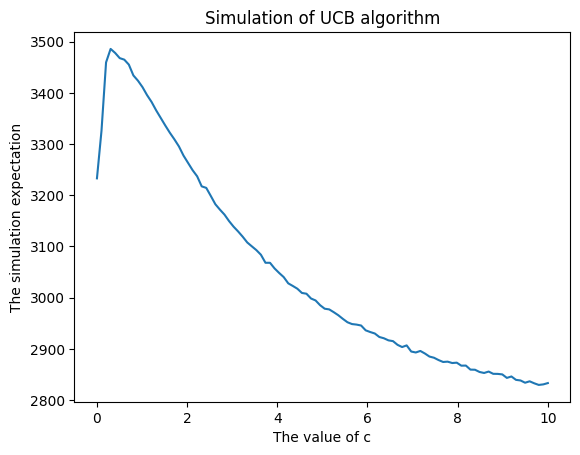

In [36]:
c=npy.linspace(0, 10, 100)
Ec=npy.zeros(100)
for i in range(100):
    Ec[i]=UCB(i*0.1,200)

print(npy.argmax(Ec)*0.1)
plt.plot(c,Ec)
plt.xlabel('The value of c')
plt.ylabel('The simulation expectation')
plt.title('Simulation of UCB algorithm')
plt.show()

由上图可知,$E(c)$最大的时候$c$是0.3

In [37]:
print(UCB(0.3,200))

3486.785


TS (Thompson Sampling) Algorithm

In [20]:
def TS(a,b,times):
    rewards=npy.zeros(times)
    for t in range(times):
        # 设定参数,初始化
        alpha=copy.deepcopy(a)
        beta= copy.deepcopy(b)
        N = 5000  # 总数
        for i in range(N):
            # 选择当前最优的项目
            max_value = 0
            max_index = 1
            for j in range(3):
                # 计算概率分布
                p = npy.random.beta(alpha[j],beta[j])
                # 更新最优项目
                if p > max_value:
                    max_value = p
                    max_index = j

            # 模拟收益并更新
            rit = reward(max_index)
            alpha[max_index] += rit
            beta[max_index] += 1-rit
            rewards[t] += rit
    return npy.average(rewards)

In [47]:
alpha=[1,1,1]
beta=[1,1,1]
print(TS(alpha,beta,200))
alpha=[601,401,2]
beta=[401,601,3]
print(TS(alpha,beta,200))

3480.065
3491.2


# Problem 6


一旦一个机器中奖,它的概率就下降$p$,其他两个机器概率增加$\frac {p}{2}$

没中奖的话,它的概率就上升$p$,其他两个机器概率下降$\frac {p}{2}$

In [115]:
## 定义新的奖励返回函数，其中新增
def n_reward(theta,arg,p):
    if npy.random.rand(1)>theta[arg]:
        for i in range(3):
            theta[i] += -p/2
        theta[arg] += p*3/2
        return 0
    else:
        for i in range(3):
            theta[i] += p/2
        theta[arg] += -p*3/2
        return 1

In [208]:
def n_UCB(c,times):

    rewards=npy.zeros(times)
    for i in range(times):
        ptheta=[0.7,0.5,0.4]
        N = 5000  # 总数
        theta = [0,0,0]
        count = [0,0,0]
        # 先试验前三次
        for j in range(3):
            count[j] += 1
            rit = n_reward(ptheta,j,0.01)
            rewards[i] += rit
            theta[j] += rit

        for t in range(3,N):
            # 选择最优
            max_value = 0
            max_index = 0
            l=npy.zeros(3)
            for k in range(3):
                l[k] = theta[k] + c * npy.sqrt((2 * npy.log(t + 1)) / count[k])
            if l[0]==l[1]:
                if l[1]==l[2]:
                    max_index = npy.random.randint(0, 3)
                else:
                    max_index = npy.random.randint(0, 2)
            elif l[1]==l[2]:
                max_index = npy.random.randint(1, 2)
            elif l[0]==l[2]:
                max_index = random.choice([0,2])    
            else:
                max_index = npy.argmax(l)
                    
            rit = n_reward(ptheta,max_index,0.001)
            rewards[i] += rit
            count[max_index] += 1
            # 更新theta
            theta[max_index]=theta[max_index] + 1/(count[max_index])*(rit-theta[max_index])
    return npy.average(rewards)

In [63]:
print(n_UCB(1,200))
print(n_UCB(10,200))
print(n_UCB(100,200))

[0.5777500000000112, 0.5544499999999951, 0.46779999999999367]
3050.35
[0.6200500000000077, 0.5185999999999968, 0.4613499999999955]
2752.515
[0.6379500000000068, 0.5117499999999987, 0.4502999999999945]
2677.06


1


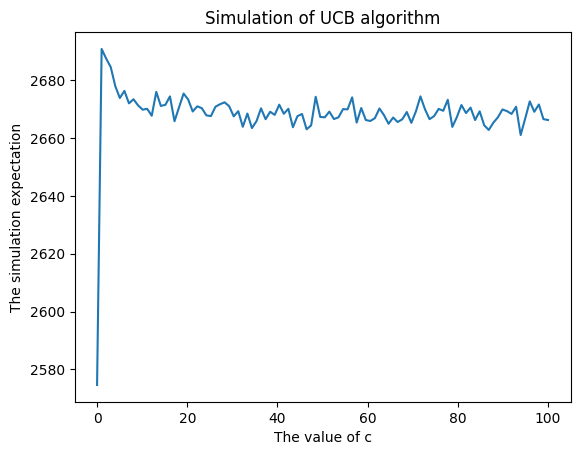

In [360]:
c=npy.linspace(0, 100, 100)
Ec=npy.zeros(100)
for i in range(100):
    Ec[i]=n_UCB(i*1,200)

print(npy.argmax(Ec)*1)
plt.plot(c,Ec)
plt.xlabel('The value of c')
plt.ylabel('The simulation expectation')
plt.title('Simulation of UCB algorithm')
plt.show()

In [39]:
print(n_UCB(50,500))

2670.34


0.4


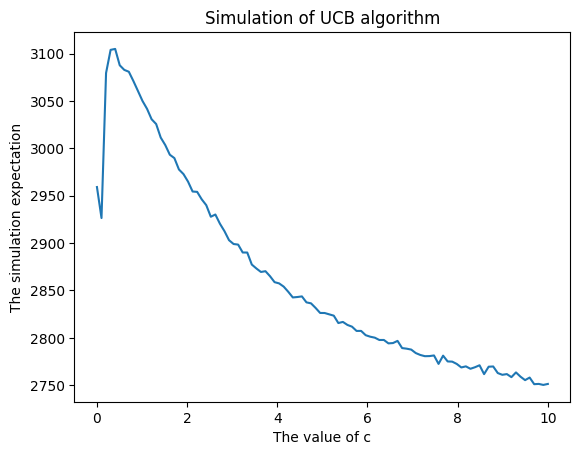

In [14]:
c=npy.linspace(0, 10, 100)
Ec=npy.zeros(100)
for i in range(100):
    Ec[i]=n_UCB(i*0.1,200)

print(npy.argmax(Ec)*0.1)
plt.plot(c,Ec)
plt.xlabel('The value of c')
plt.ylabel('The simulation expectation')
plt.title('Simulation of UCB algorithm')
plt.show()

In [22]:
print(n_UCB(0.4,500))

3102.476


In [47]:
def n_TS(a,b,times):
    rewards=npy.zeros(times)
    for t in range(times):
        theta=[0.7,0.5,0.4]
        alpha=copy.deepcopy(a)
        beta= copy.deepcopy(b)
        N = 5000  # 总数
        for i in range(N):
            # 选择当前最优的项目
            max_value = 0
            max_index = 0
            for j in range(3):
                # 计算概率分布
                p = npy.random.beta(alpha[j],beta[j])
                # 更新最优项目
                if p > max_value:
                    max_value = p
                    max_index = j

            # 模拟收益并更新
            rit = n_reward(theta,max_index,0.001)
            alpha[max_index] += rit
            beta[max_index] += 1-rit
            rewards[t] += rit
    print(theta,alpha,beta)
    return npy.average(rewards)

In [41]:
print(n_TS([1,1,1],[1,1,1],200))

[0.5464999999999919, 0.5474999999999827, 0.5059999999999925] [1631, 810, 246] [1406, 719, 194]
2679.735


In [202]:
def s_TS(alpha,beta,rewards,theta):
    # 选择当前最优的项目
    max_value = 0
    max_index = 0
    for j in range(3):
        # 计算概率分布
        p = npy.random.beta(alpha[j],beta[j])
        # 更新最优项目
        if p > max_value:
            max_value = p
            max_index = j
    # 模拟收益并更新
    rit = n_reward(theta,max_index,0.0001)
    alpha[max_index] += rit
    beta[max_index] += 1-rit
    rewards[0] += rit

In [201]:
rewards=[0]
theta=[0.7,0.5,0.3]

for j in range(500):
    alpha=[1,1,1]
    beta=[1,1,1]
    for i in range(10):
        s_TS(alpha,beta,rewards,theta)
print(alpha,beta,rewards,theta)


[1, 4, 5] [2, 1, 3] [2443] [0.48999999999999977, 0.3949999999999999, 0.6150000000000002]


In [116]:
def slowdeathAlgorithm(alpha,beta,rewards,theta):
    p1=alpha[0]/beta[0]
    p2=alpha[1]/beta[1]
    p3=alpha[2]/beta[2]
    first= npy.argsort([p1,p2,p3])[2]
    second= npy.argsort([p1,p2,p3])[1]
    varepsilon=p1/(p1+p2)
    if npy.random.rand(1) <varepsilon:
        It = first
    else:
        It = second

    rewards[0]+=n_reward(theta,It,0.0001)

In [117]:
def Tslowdeath(exploration,times):
    total_rewards = npy.zeros(times)
    for i in range(times):        
        rewards=[0]
        theta=[0.7,0.65,0.3]
        alpha=[1,1,1]
        beta=[1,1,1]
        for j in range(exploration):
            s_TS(alpha,beta,rewards,theta)
        for k in range(5000-exploration):
            slowdeathAlgorithm(alpha,beta,rewards,theta)
        total_rewards[i] = rewards[0]
    return npy.average(total_rewards)

In [51]:
print(Tslowdeath(1000,200))

2660.46


820


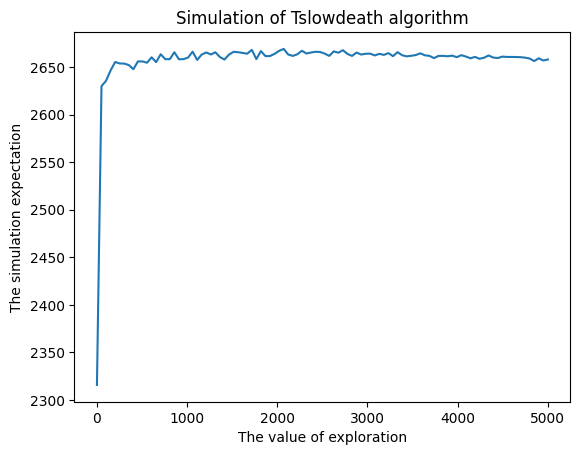

In [52]:
exploration=npy.linspace(0, 5000, 100)
ETsd=npy.zeros(100)
for i in range(100):
    ETsd[i]=Tslowdeath(i*50,200)

print(npy.argmax(ETsd)*50)
plt.plot(exploration,ETsd)
plt.xlabel('The value of exploration')
plt.ylabel('The simulation expectation')
plt.title('Simulation of Tslowdeath algorithm')
plt.show()

In [53]:
print(Tslowdeath(2050,200))

2664.605


1900


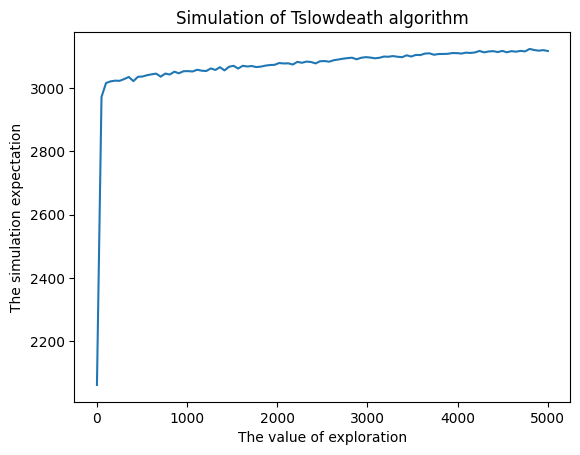

In [31]:
exploration=npy.linspace(0, 5000, 100)
ETsd=npy.zeros(100)
for i in range(100):
    ETsd[i]=Tslowdeath(i*50,200)

print(npy.argmax(ETsd)*20)
plt.plot(exploration,ETsd)
plt.xlabel('The value of exploration')
plt.ylabel('The simulation expectation')
plt.title('Simulation of Tslowdeath algorithm')
plt.show()

740


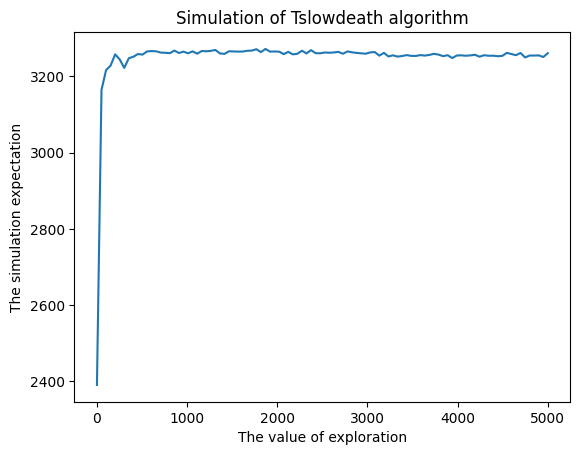

In [118]:
exploration=npy.linspace(0, 5000, 100)
ETsd=npy.zeros(100)
for i in range(100):
    ETsd[i]=Tslowdeath(i*50,200)

print(npy.argmax(ETsd)*20)
plt.plot(exploration,ETsd)
plt.xlabel('The value of exploration')
plt.ylabel('The simulation expectation')
plt.title('Simulation of Tslowdeath algorithm')
plt.show()

In [32]:
print(Tslowdeath(4750,200))

3118.84


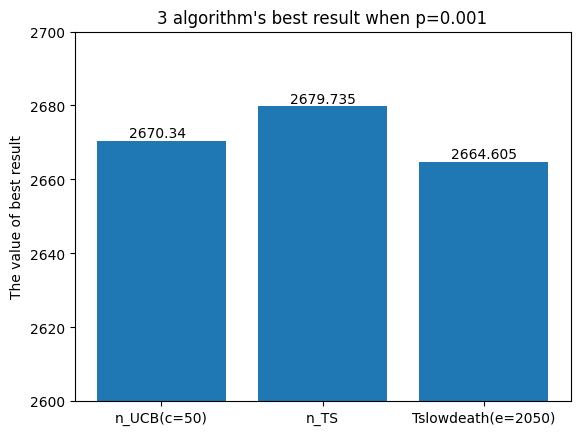

In [56]:
# 数据
x = ['n_UCB(c=50)', 'n_TS', 'Tslowdeath(e=2050)']
y = [2670.34,2679.735,2664.605]

# 绘图
plt.title("3 algorithm's best result when p=0.001")
plt.bar(x, y)
plt.ylabel('The value of best result')
plt.ylim(2600, 2700)
for i, v in enumerate(y):
    plt.text(i-0.2, v+1, str(v))
plt.show()

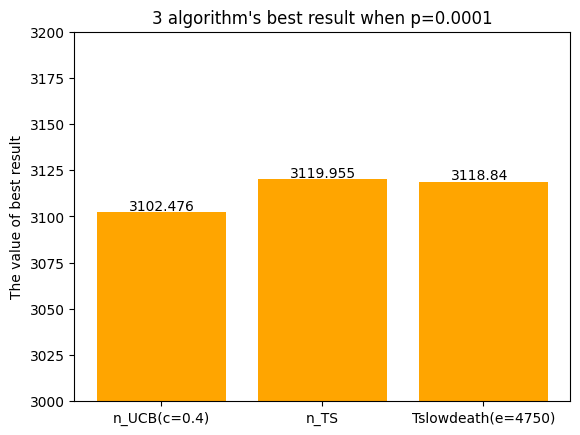

In [58]:
# 数据
x = ['n_UCB(c=0.4)', 'n_TS', 'Tslowdeath(e=4750)']
y = [3102.476, 3119.955, 3118.84]

# 绘图
plt.title("3 algorithm's best result when p=0.0001")
plt.bar(x, y,color='orange')
plt.ylabel('The value of best result')
plt.ylim(3000, 3200)
for i, v in enumerate(y):
    plt.text(i-0.2, v+1, str(v))
plt.show()

# Part II Bayesian Bandit Algorithms

In [281]:
## 定义新的奖励返回函数，其中新增
def nn_reward(arg,theta):
    if npy.random.rand(1)>theta[arg]:
        return 0
    else:
        return 1

In [282]:
def generatetheta(alpha,beta):
    theta=npy.zeros(2)
    theta[0]=npy.random.beta(alpha[0],beta[0])
    theta[1]=npy.random.beta(alpha[1],beta[1])
    return theta

In [303]:
def nn_nn(a,b,times,gamma,theta):
    rewards=npy.zeros(times)
    for t in range(times):
        alpha=copy.deepcopy(a)
        beta= copy.deepcopy(b)
        N = 5000  # 总数
        for i in range(N):
            # 选择当前最优的项目
            Ep = npy.zeros(2)
            max_index = 0
            for j in range(2):
                # 计算概率分布
                Ep[j] = alpha[j]/(alpha[j]+beta[j])
                # 更新最优项目
                if Ep[0] > Ep[1]:
                    max_index = 0
                elif Ep[0] < Ep[1]:
                    max_index = 1
                else:
                    max_index = npy.random.randint(0, 2)
            # 模拟收益并更新
            rit = nn_reward(max_index,theta)
            alpha[max_index] += rit
            beta[max_index] += 1-rit
            x=math.pow ((rit*gamma), i)
            if (x>0)&(x<0.001):
                break
            rewards[t] += x
    return npy.average(rewards)

In [298]:
def nnn_nnn(alpha,beta,times,gamma):
    rewards=npy.zeros(times)
    for t in range(times):
        rewards[t] = nn_nn(alpha,beta,100,gamma,generatetheta(alpha,beta))
    return npy.average(rewards)

In [359]:
alpha=[1,1]
beta=[1,1]

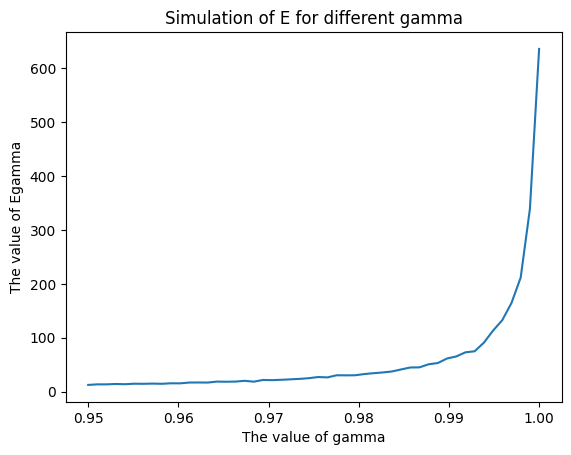

In [354]:
Gamma=npy.linspace(0.95, 1, 50)
Egamma=npy.zeros(50)
for i in range(50):
    Egamma[i]=nnn_nnn(alpha,beta,100,0.95+i*0.001)

plt.plot(Gamma,Egamma)
plt.xlabel('The value of gamma')
plt.ylabel('The value of Egamma')
plt.title('Simulation of E for different gamma')
plt.show()

In [338]:
Ethetamax = npy.zeros(5000)
for i in range (5000):
    Ethetamax[i] = npy.max(generatetheta([1,1],[1,1]))
print(npy.average(Ethetamax))

0.671602070524271


$$
\theta_{max}=0.672
$$

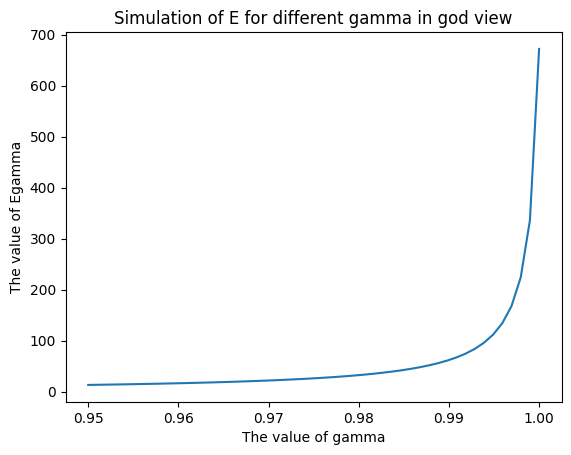

In [355]:
Gamma=npy.linspace(0.95, 1, 50)
Egod=npy.zeros(50)
for i in range(50):
    Egod[i]=0.672*(1-math.pow (0.95+i*0.001, 10000))/(1-(0.95+i*0.001))

plt.plot(Gamma,Egod)
plt.xlabel('The value of gamma')
plt.ylabel('The value of Egamma')
plt.title('Simulation of E for different gamma in god view')
plt.show()

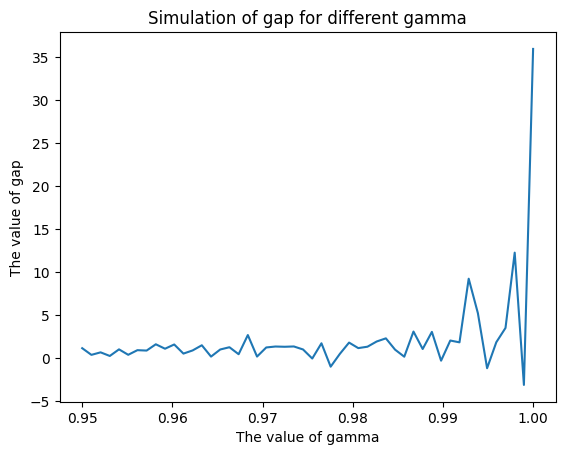

In [356]:
# Gamma=npy.linspace(0.95, 1, 50)
# Egamma=npy.zeros(50)
# Egod=npy.zeros(50)
gap=npy.zeros(50)
for i in range(50):
    # Egod[i]=0.7*(1-math.pow (0.95+i*0.001, 5000))/(1-(0.95+i*0.001))
    # Egamma[i]=nnn_nnn(alpha,beta,200,0.95+i*0.001)
    gap[i]=Egod[i]-Egamma[i]
plt.plot(Gamma,gap)
plt.xlabel('The value of gamma')
plt.ylabel('The value of gap')
plt.title('Simulation of gap for different gamma')
plt.show()

Text(0.5, 1.0, 'Simulation of E for different gamma')

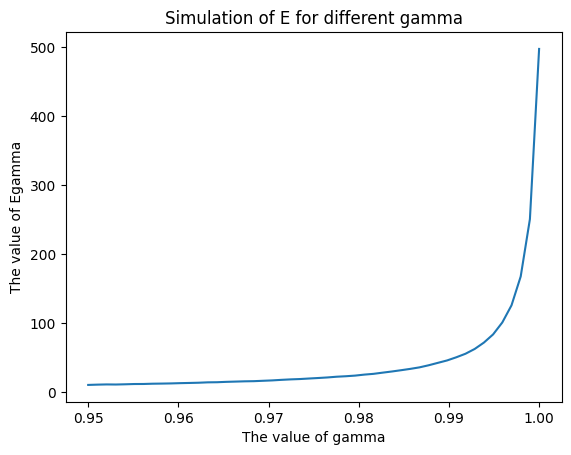

In [229]:
alpha=[1,10]
beta=[10,1]
Gamma=npy.linspace(0.95, 1, 50)
Egamma=npy.zeros(50)
for i in range(50):
    Egamma[i]=nn_nn(alpha,beta,200,0.95+i*0.001)

plt.plot(Gamma,Egamma)
plt.xlabel('The value of gamma')
plt.ylabel('The value of Egamma')
plt.title('Simulation of E for different gamma')
plt.show()

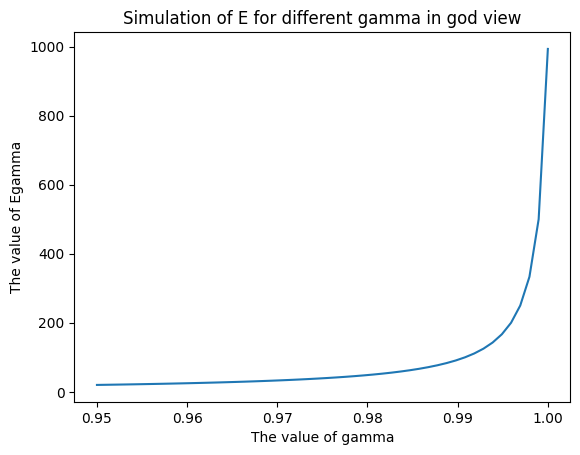

In [258]:
Gamma=npy.linspace(0.95, 1, 50)
Egod=npy.zeros(50)
for i in range(50):
    Egod[i]=1*(1-math.pow (0.95+i*0.001, 5000))/(1-(0.95+i*0.001))

plt.plot(Gamma,Egod)
plt.xlabel('The value of gamma')
plt.ylabel('The value of Egamma')
plt.title('Simulation of E for different gamma in god view')
plt.show()

In [347]:
def nn_TS(a,b,times,gamma,theta):
    rewards=npy.zeros(times)
    for t in range(times):
        alpha=copy.deepcopy(a)
        beta= copy.deepcopy(b)
        N = 5000  # 总数
        for i in range(N):
            # 选择当前最优的项目
            Ep = npy.zeros(2)
            max_index = 0
            for j in range(2):
                # 计算概率分布
                Ep[j] = npy.random.beta(alpha[j],beta[j])
                # 更新最优项目
                if Ep[0] > Ep[1]:
                    max_index = 0
                elif Ep[0] < Ep[1]:
                    max_index = 1
                else:
                    max_index = npy.random.randint(0, 2)
            # 模拟收益并更新
            rit = nn_reward(max_index,theta)
            alpha[max_index] += rit
            beta[max_index] += 1-rit
            x=math.pow ((rit*gamma), i)
            if (x>0)&(x<0.001):
                break
            rewards[t] += x
    return npy.average(rewards)

In [344]:
def nnn_TS(alpha,beta,times,gamma):
    rewards=npy.zeros(times)
    for t in range(times):
        rewards[t] = nn_TS(alpha,beta,100,gamma,generatetheta(alpha,beta))
    return npy.average(rewards)

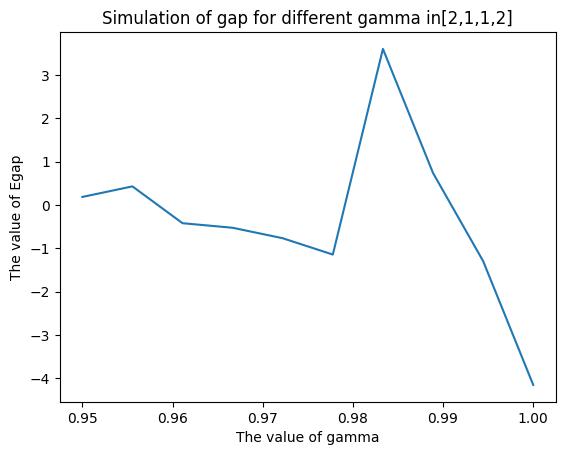

In [357]:
alpha=[2,1]
beta=[1,2]
Gamma=npy.linspace(0.95, 1, 10)
Egap=npy.zeros(10)
ETSgamma=npy.zeros(10)
Enngamma=npy.zeros(10)
for i in range(10):
    ETSgamma[i]=nnn_TS(alpha,beta,100,0.95+i*0.005)
    Enngamma[i]=nnn_nnn(alpha,beta,100,0.95+i*0.005)
    Egap[i]=ETSgamma[i]-Enngamma[i]
plt.plot(Gamma,Egap)
plt.xlabel('The value of gamma')
plt.ylabel('The value of Egap')
plt.title('Simulation of gap for different gamma in[2,1,1,2]')
plt.show()